# 카이제곱 검정

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

%precision 4

'%.4f'

###  카이제곱 분포

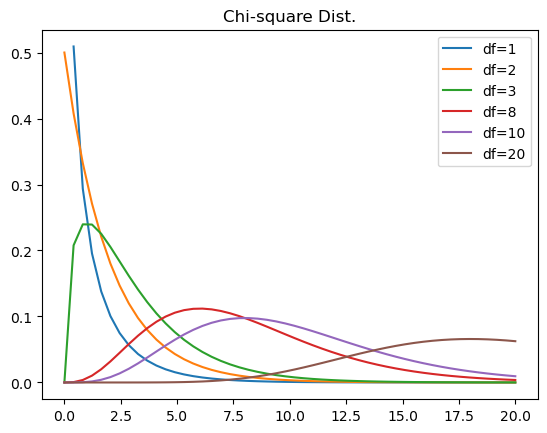

In [2]:
x = np.linspace(0,20,50)
for df in [1,2,3,8,10,20]:
    rv = stats.chi2(df=df)
    y = rv.pdf(x)
    plt.plot(x,y, label=f'df={df}')
    
plt.title('Chi-square Dist.')
plt.legend()
plt.show()

## 적합도 검정

- 가설
    - H0: 어떤 분포를 따른다

예제1. 완두콩 교배결과가 멘델의 유전법칙(9:3:3:1)을 따르는가?
- H0 : 멘델의 유전법칙을 따른다 9:3:3:1

In [3]:
#관측 빈도
observation = [322, 108, 98, 32]

#기대 빈도
mendel = [9, 3, 3, 1]
ratio = mendel / np.sum(mendel)
exp = ratio * np.sum(observation)
exp

array([315., 105., 105.,  35.])

In [8]:
#적합도 검정
stat, p = stats.chisquare(observation, exp)
print(f'적합도 검정통계량: {stat:.4f}, p-value{p:.4f}')
result = 'Accept H0' if p>0.05 else 'Reject H0'
print(f'적합도 검정결과 : {result}') 
# -> 멘델의 유전 법칙을 따른다.

적합도 검정통계량: 0.9651, p-value0.8097
적합도 검정결과 : Accept H0


예제2. 주사위 눈의 분포는 균일분포를 따르는지 적합도 검정을 수행하시오.

- H0 : 각 눈이 나올 확률은 동일하다(균일분포를 따른다)

In [16]:
#관측값
obs = [16, 18, 16, 14, 12, 12]

#기대 빈도
expec = [10, 10, 10, 10, 10, 10]
exp = expec / np.sum(expec) * np.sum(obs)
exp

array([14.6667, 14.6667, 14.6667, 14.6667, 14.6667, 14.6667])

In [13]:
exp = [sum(obs) / 6] * 6
exp

[14.6667, 14.6667, 14.6667, 14.6667, 14.6667, 14.6667]

In [14]:
#관측값
obs = [16, 18, 16, 14, 12, 12]
n = np.sum(obs)
print(n)

#기대 빈도
ratio = [1/6]*6
exp = n * ratio
exp = ratio * np.sum(obs)

88

In [15]:
stat, p = stats.chisquare(obs, exp)
print(f'적합도 검정통계량: {stat:.4f}, p-value{p:.4f}')
result = 'Accept H0' if p>0.05 else 'Reject H0'
print(f'적합도 검정결과 : {result}') 

적합도 검정통계량: 2.0000, p-value0.8491
적합도 검정결과 : Accept H0


## 독립성 검정

#### 예제. 흡연유무와 폐암여부 연관성

In [6]:
data = pd.DataFrame([[14,2],[10,9]], 
                    index=['흡연_무', '흡연_유'],
                    columns=['폐암_무', '폐암_유'])
data

,폐암_무,폐암_유
흡연_무,14,2
흡연_유,10,9


In [10]:
stat, p, df, exp = stats.chi2_contingency(data, correction=False)
exp_df = pd.DataFrame(exp, index=data.index, columns=data.columns)
print(f'chi-square: {stat:.3f}, p-value: {p:.4f}, df(자유도)={df}')
print(f'기대빈도: {exp_df}')

chi-square: 4.900, p-value: 0.0269, df(자유도)=1
기대빈도:            폐암_무      폐암_유
흡연_무  10.971429  5.028571
흡연_유  13.028571  5.971429


In [11]:
stat, p, df, exp = stats.chi2_contingency(data, correction=True)
exp_df = pd.DataFrame(exp, index=data.index, columns=data.columns)
print(f'chi-square: {stat:.3f}, p-value: {p:.4f}, df(자유도)={df}')
print(f'기대빈도: {exp_df}')

chi-square: 3.416, p-value: 0.0646, df(자유도)=1
기대빈도:            폐암_무      폐암_유
흡연_무  10.971429  5.028571
흡연_유  13.028571  5.971429


#### 예제. 당뇨와 비만의 연관성

In [12]:
data2 = pd.read_excel('data/당뇨비만데이터.xlsx')
data2

,환자번호,당뇨 여부,비만 여부
0,1,Y,N
1,2,N,Y
2,3,N,N
3,4,N,N
4,5,N,Y
...,...,...,...
95,96,N,N
96,97,N,N
97,98,Y,N
98,99,N,N


In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   환자번호    100 non-null    int64 
 1   당뇨 여부   100 non-null    object
 2   비만 여부   100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [16]:
cont = pd.crosstab(data2['당뇨 여부'], data2['비만 여부'])
cont

비만 여부,N,Y
당뇨 여부,,
N,62,22
Y,12,4


In [19]:
stat, p, df, exp = stats.chi2_contingency(cont, correction=False)
exp_df = pd.DataFrame(exp, index=cont.index, columns=cont.columns)
print(f'chi-square: {stat:.3f}, p-value: {p:.4f}, df(자유도)={df}')
print(f'기대빈도')
exp_df

chi-square: 0.010, p-value: 0.9207, df(자유도)=1
기대빈도


비만 여부,N,Y
당뇨 여부,,
N,62.16,21.84
Y,11.84,4.16


In [20]:
stat, p, df, exp = stats.chi2_contingency(cont, correction=True)
print(f'chi-square: {stat:.3f}, p-value: {p:.4f}, df(자유도)={df}')

chi-square: 0.000, p-value: 1.0000, df(자유도)=1


=> 당뇨와 비만의 연관성은 없다

In [23]:
elem, count = stats.contingency.crosstab(data2['당뇨 여부'], data2['비만 여부'])
print(elem)
print(count)

(array(['N', 'Y'], dtype=object), array(['N', 'Y'], dtype=object))
[[62 22]
 [12  4]]


In [24]:
data2['당뇨 여부'] = data2['당뇨 여부'].astype('category')
data2['비만 여부'] = data2['비만 여부'].astype('category')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   환자번호    100 non-null    int64   
 1   당뇨 여부   100 non-null    category
 2   비만 여부   100 non-null    category
dtypes: category(2), int64(1)
memory usage: 1.3 KB


In [25]:
elem, count = stats.contingency.crosstab(data2['당뇨 여부'], data2['비만 여부'])
print(elem)
print(count)

(array(['N', 'Y'], dtype=object), array(['N', 'Y'], dtype=object))
[[62 22]
 [12  4]]


## 동질성 검정

#### 예제. 

A,B,C 서로 다른 3가지 헤드라인의 분포가 같은가?

- H0 : A, B, C 각각의 헤드라인에 대한 클릭 분포는 동일하다

In [27]:
data3 = pd.DataFrame([[14,8,12],[986,992,988]], 
                   index = ['click', 'non-click'],
                   columns=['A','B','C'])
data3

,A,B,C
click,14,8,12
non-click,986,992,988


In [28]:
stat, p, df, exp = stats.chi2_contingency(data3, correction=False)
exp_df = pd.DataFrame(exp, index=data3.index, columns=data3.columns)
print(f'chi-square: {stat:.3f}, p-value: {p:.4f}, df(자유도)={df}')
print(f'기대빈도')
exp_df

chi-square: 1.666, p-value: 0.4348, df(자유도)=2
기대빈도


,A,B,C
click,11.333333,11.333333,11.333333
non-click,988.666667,988.666667,988.666667


### Fisher's Exact Test

: 빈도 수가 극치 적거나(5개 이하 빈도가 전체 셀 중 20% 이상 존재하는 경우), 서로의 빈도 수 차이가 많이 나는 경우

#### 예제

H0 : 약의 종류와 효과 유무는 연관성이 없다

In [30]:
data4 = pd.DataFrame([[1,6],[5,2]],
                     index=['가짜약', '진짜약'],
                      columns=['효과있음', '효과없음'])
data4

,효과있음,효과없음
가짜약,1,6
진짜약,5,2


In [32]:
#기대빈도 계산
stats.contingency.expected_freq(data4)

array([[3., 4.],
       [3., 4.]])

In [33]:
stat, p, df, exp = stats.chi2_contingency(data4, correction=False)
print(f'chi-square: {stat:.3f}, p-value: {p:.4f}, df(자유도)={df}')

chi-square: 4.667, p-value: 0.0308, df(자유도)=1


In [34]:
#Fisher Exact test
stats.fisher_exact(data4)

SignificanceResult(statistic=0.06666666666666667, pvalue=0.10256410256410255)

#### 예제

In [36]:
data = pd.DataFrame([[14,2],[10,9]], 
                    index=['흡연_무', '흡연_유'],
                    columns=['폐암_무', '폐암_유'])
data

,폐암_무,폐암_유
흡연_무,14,2
흡연_유,10,9


In [37]:
stats.fisher_exact(data)

SignificanceResult(statistic=6.3, pvalue=0.03535674559033847)

#### 문제1.

남녀별로 선호하는 스마트폰 사용 기능에 차이가 있는지 유의수준 5%에서 가설검정을 수행하시오.

|구분|인터넷|어플|통화나문자|
|남|68|43|25|
|여|45|36|15|

- 가설설정:
    - H0 : 성별과 사용기능 차이는 관계가 없다(독립적이다)

In [41]:
df1 = pd.DataFrame([[68, 43, 25],[45,46,15]],
                  index = ['남', '여'],
                  columns=['인터넷', '어플', '통화/문자'])
df1

,인터넷,어플,통화/문자
남,68,43,25
여,45,46,15


In [42]:
stat, p, df, exp = stats.chi2_contingency(df1, correction=False)
print(f'chi-square: {stat:.3f}, p-value: {p:.4f}, df(자유도)={df}')
print(f'기대빈도')
exp_df = pd.DataFrame(exp, index=df1.index, columns=df1.columns)
exp_df

chi-square: 3.619, p-value: 0.1637, df(자유도)=2
기대빈도


,인터넷,어플,통화/문자
남,63.504132,50.016529,22.479339
여,49.495868,38.983471,17.520661


In [44]:
alpha = 0.05
if p < alpha:
    print('H0 기각: 성별에 따른 선호 기능 차이가 존재한다.')
else:
    print('H0 기각: 성별에 따른 선호 기능 차이가 존재하지 않는다.')

H0 기각: 성별에 따른 선호 기능 차이가 존재하지 않는다.


#### 문제2.

어느 회사에서 근무중 개인적인 인터넷 사용에 대한 찬반의견을 조사하였다. 
성별에 따라 찬반의견이 다른지 유의수준 5%에서 가설검정을 수행하시오.

||찬성|반대|
|남|25|36|
|여|35|4|

- 가설
    - H0 : 성별에 따라 인터넷 사용 찬반 의견 비율이 동일하다

In [ ]:
df1 = pd.DataFrame([[25,36],[35,4]],
    index=['남','여'],columns=['찬성','반대'])
df1

# 기대빈도
exp_df1 = pd.DataFrame(stats.contingency.expected_freq(df1),index=df1.index,columns=df1.index)

stat, p, df, exp = stats.chi2_contingency(df1, correction=True)
print(f'chi-square: {stat:.3f}, p_value: {p:.4f}, df: {df:.3f}')

exp_df1

--------------------------------------